In [145]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics



## Load dataset 

In [146]:
df= pd.read_csv("/Users/ankushchoudhari76/Downloads/Reviews.csv")

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [148]:
df.shape

(568454, 10)

In [149]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [150]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


<Axes: >

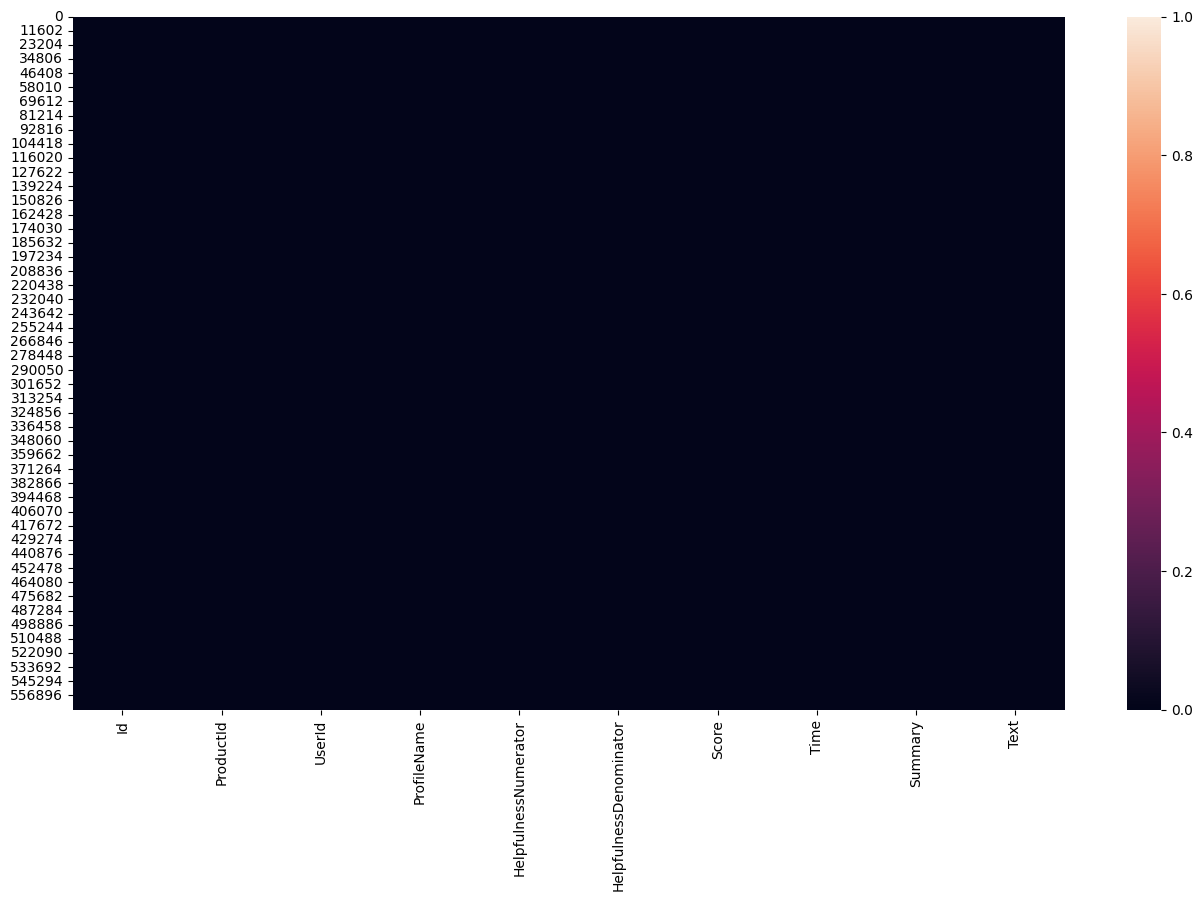

In [151]:
import seaborn as sns 
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'


In [ ]:
Score = df['Score']
Score = pd.to_numeric(Score, errors='coerce')  # Convert Score to numeric, non-numeric will become NaN
Score = Score.map(partition)
Summary = df['Summary']
X_train, X_test, y_train, y_test = train_test_split(Summary, Score, test_size=0.2, random_state=42)

In [155]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [156]:
df1 = df.drop(['Id','ProductId', 'UserId', 'ProfileName', 
               'HelpfulnessNumerator', 'HelpfulnessDenominator', 
               'Time', 'Text'], axis=1)

In [157]:
df1.head()

,Score,Summary
0,5,Good Quality Dog Food
1,1,Not as Advertised
2,4,"""Delight"" says it all"
3,2,Cough Medicine
4,5,Great taffy


In [158]:
tmp1 = df1.copy()  
tmp1['Score'] = pd.to_numeric(tmp1['Score'], errors='coerce')

In [159]:
tmp = tmp1.head(1000)

In [160]:
tmp['Score'] = tmp['Score'].map(partition)

/var/folders/zn/rz8y3h8x49df184xkjs53zhw0000gn/T/ipykernel_9165/4129746929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Score'] = tmp['Score'].map(partition)


In [161]:
tmp.head()

,Score,Summary
0,positive,Good Quality Dog Food
1,negative,Not as Advertised
2,positive,"""Delight"" says it all"
3,negative,Cough Medicine
4,positive,Great taffy


## DATA CLEANING

In [162]:
tmp.isnull().sum()

Score      0
Summary    0
dtype: int64

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if not isinstance(text, str):  
        return ""  # Convert NaN or float to empty string
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

X_train = X_train.fillna("")
X_test = X_test.fillna("")

X_train_cleaned = [preprocess_text(text) for text in X_train]
X_test_cleaned = [preprocess_text(text) for text in X_test]

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train_cleaned)
X_test_tfidf = vectorizer.transform(X_test_cleaned)



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ankushchoudhari76/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ankushchoudhari76/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


model = LogisticRegression(max_iter=1000)


model.fit(X_train_tfidf, y_train)


y_pred = model.predict(X_test_tfidf)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

    negative       0.77      0.46      0.58     16181
    positive       0.92      0.98      0.95     97510

    accuracy                           0.90    113691
   macro avg       0.84      0.72      0.76    113691
weighted avg       0.90      0.90      0.89    113691

Confusion Matrix:
 [[ 7505  8676]
 [ 2279 95231]]


## Applying Multinomial Naïve Bayes learning method¶

In [165]:
from sklearn.naive_bayes import MultinomialNB
prediction = dict()

In [166]:
model = MultinomialNB().fit(X_train_tfidf, y_train)
prediction['Multinomial'] = model.predict(X_test_tfidf)

## Applying Bernoulli Naïve Bayes learning method

In [167]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB().fit(X_train_tfidf, y_train)
prediction['Bernoulli'] = model.predict(X_test_tfidf)

## Applying Logistic regression learning method¶

In [178]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train_tfidf, y_train)
prediction['Logistic'] = logreg.predict(X_test_tfidf)

/Users/ankushchoudhari76/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [179]:
prediction

{'Multinomial': array(['positive', 'positive', 'positive', ..., 'positive', 'positive',
        'positive'], dtype='<U8'),
 'Bernoulli': array(['positive', 'positive', 'positive', ..., 'positive', 'positive',
        'positive'], dtype='<U8'),
 'Logistic': array(['positive', 'positive', 'positive', ..., 'positive', 'positive',
        'positive'], dtype=object)}

In [180]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# MultinomialNB evaluation
print("MultinomialNB Report:")
print(classification_report(y_test, prediction['Multinomial']))
print("Confusion Matrix:")
print(confusion_matrix(y_test, prediction['Multinomial']))
print("Accuracy:", accuracy_score(y_test, prediction['Multinomial']))

# BernoulliNB evaluation
print("\nBernoulliNB Report:")
print(classification_report(y_test, prediction['Bernoulli']))
print("Confusion Matrix:")
print(confusion_matrix(y_test, prediction['Bernoulli']))
print("Accuracy:", accuracy_score(y_test, prediction['Bernoulli']))

# Logistic Regression evaluation
print("\nLogistic Regression Report:")
print(classification_report(y_test, prediction['Logistic']))
print("Confusion Matrix:")
print(confusion_matrix(y_test, prediction['Logistic']))
print("Accuracy:", accuracy_score(y_test, prediction['Logistic']))


MultinomialNB Report:
              precision    recall  f1-score   support

    negative       0.79      0.38      0.52     16181
    positive       0.91      0.98      0.94     97510

    accuracy                           0.90    113691
   macro avg       0.85      0.68      0.73    113691
weighted avg       0.89      0.90      0.88    113691

Confusion Matrix:
[[ 6177 10004]
 [ 1601 95909]]
Accuracy: 0.897925077622679

BernoulliNB Report:
              precision    recall  f1-score   support

    negative       0.69      0.51      0.59     16181
    positive       0.92      0.96      0.94     97510

    accuracy                           0.90    113691
   macro avg       0.81      0.74      0.77    113691
weighted avg       0.89      0.90      0.89    113691

Confusion Matrix:
[[ 8323  7858]
 [ 3736 93774]]
Accuracy: 0.8980218311036053

Logistic Regression Report:
              precision    recall  f1-score   support

    negative       0.74      0.50      0.60     16181
    positi

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}


bnb = BernoulliNB()

grid_search = GridSearchCV(bnb, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated F1 Score:", grid_search.best_score_)


best_bnb = grid_search.best_estimator_
y_pred = best_bnb.predict(X_test_tfidf)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters: {'alpha': 0.1}
Best Cross-Validated F1 Score: 0.8911903619029585

Classification Report:
              precision    recall  f1-score   support

    negative       0.69      0.52      0.59     16181
    positive       0.92      0.96      0.94     97510

    accuracy                           0.90    113691
   macro avg       0.81      0.74      0.77    113691
weighted avg       0.89      0.90      0.89    113691

Confusion Matrix:
[[ 8413  7768]
 [ 3781 93729]]
Accuracy: 0.8984176407983042


In [ ]:
from sklearn.decomposition import TruncatedSVD
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

svd = TruncatedSVD(n_components=300, random_state=42)
X_train_dense = svd.fit_transform(X_train_tfidf)
X_test_dense = svd.transform(X_test_tfidf)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_dense, y_train)

# Check new class distribution
print("After SMOTE, count of 'positive':", sum(y_train_bal == 'positive'))
print("After SMOTE, count of 'negative':", sum(y_train_bal == 'negative'))

# Step 3: Train BernoulliNB on balanced data
from sklearn.naive_bayes import BernoulliNB
# Use best alpha parameter found previously
bnb_bal = BernoulliNB(alpha=0.1)
bnb_bal.fit(X_train_bal, y_train_bal)

# Step 4: Predict on test set (transformed to dense using SVD)
y_pred_bal = bnb_bal.predict(X_test_dense)

# Step 5: Evaluate the balanced model
print("\nBalanced Model Classification Report:")
print(classification_report(y_test, y_pred_bal))
print("Balanced Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bal))
print("Balanced Model Accuracy:", accuracy_score(y_test, y_pred_bal))


/Users/ankushchoudhari76/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


After SMOTE, count of 'positive': 388907
After SMOTE, count of 'negative': 388907

Balanced Model Classification Report:
              precision    recall  f1-score   support

    negative       0.26      0.77      0.38     16181
    positive       0.94      0.63      0.75     97510

    accuracy                           0.65    113691
   macro avg       0.60      0.70      0.57    113691
weighted avg       0.84      0.65      0.70    113691

Balanced Model Confusion Matrix:
[[12456  3725]
 [36386 61124]]
Balanced Model Accuracy: 0.6471928296874863


In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Logistic Regression model with class weights set to 'balanced'
logreg_bal = LogisticRegression(class_weight='balanced', max_iter=1000)

# Train model on the TF-IDF features (assuming X_train_tfidf and y_train already exist)
logreg_bal.fit(X_train_tfidf, y_train)

# Predict on test set
y_pred_bal = logreg_bal.predict(X_test_tfidf)

# Evaluation
print("Balanced Logistic Regression Report:")
print(classification_report(y_test, y_pred_bal))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bal))
print("Accuracy:", accuracy_score(y_test, y_pred_bal))


Balanced Logistic Regression Report:
              precision    recall  f1-score   support

    negative       0.44      0.82      0.57     16181
    positive       0.96      0.82      0.89     97510

    accuracy                           0.82    113691
   macro avg       0.70      0.82      0.73    113691
weighted avg       0.89      0.82      0.84    113691

Confusion Matrix:
[[13263  2918]
 [17110 80400]]
Accuracy: 0.8238382985460591


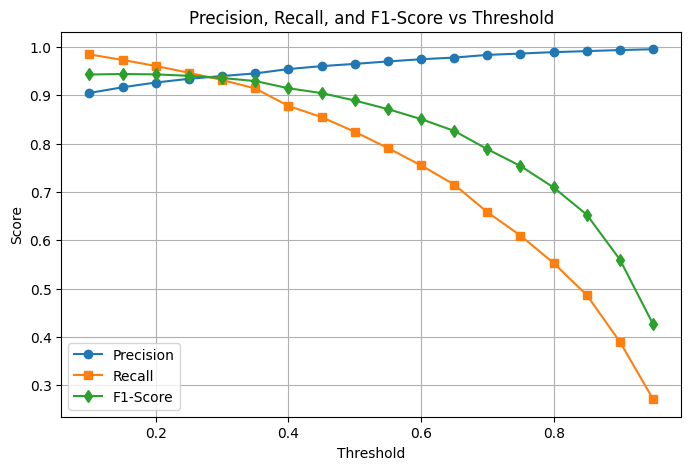

Best Threshold: 0.15000000000000002

Classification Report with Best Threshold:
              precision    recall  f1-score   support

    negative       0.74      0.47      0.57     16181
    positive       0.92      0.97      0.94     97510

    accuracy                           0.90    113691
   macro avg       0.83      0.72      0.76    113691
weighted avg       0.89      0.90      0.89    113691

Confusion Matrix:
[[ 7546  8635]
 [ 2619 94891]]


In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, classification_report, confusion_matrix


y_pred_prob = logreg_bal.predict_proba(X_test_tfidf)[:, 1]


thresholds = np.arange(0.1, 1.0, 0.05)

precision_scores = []
recall_scores = []
f1_scores = []

for threshold in thresholds:
    y_pred_thresh = (y_pred_prob >= threshold).astype(int)

    
    y_pred_labels = np.where(y_pred_thresh == 1, "positive", "negative")

    
    report = classification_report(y_test, y_pred_labels, output_dict=True)
    
    precision_scores.append(report['positive']['precision'])
    recall_scores.append(report['positive']['recall'])
    f1_scores.append(report['positive']['f1-score'])

plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision_scores, label='Precision', marker='o')
plt.plot(thresholds, recall_scores, label='Recall', marker='s')
plt.plot(thresholds, f1_scores, label='F1-Score', marker='d')

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-Score vs Threshold")
plt.legend()
plt.grid()
plt.show()

best_threshold = thresholds[np.argmax(f1_scores)]
print("Best Threshold:", best_threshold)

y_pred_best = np.where(y_pred_prob >= best_threshold, "positive", "negative")


print("\nClassification Report with Best Threshold:")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))


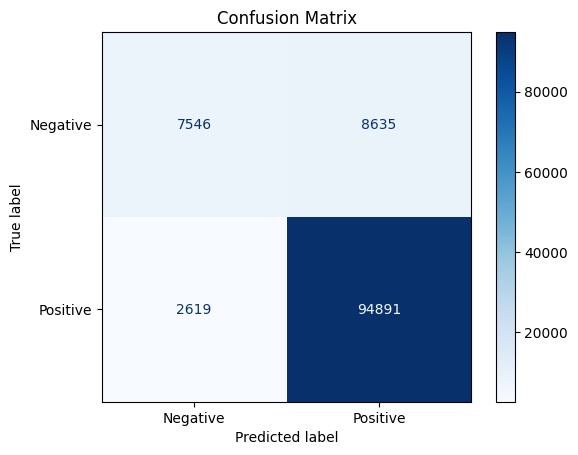

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred_best)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


# <<<<<<<<<<<<< MODEL TESTING >>>>>>>>>>>>>

In [186]:

new_reviews = ["The food was amazing and delicious!", 
               "Worst experience, I will never order again."]


new_reviews_cleaned = [preprocess_text(text) for text in new_reviews]

X_new_tfidf = vectorizer.transform(new_reviews_cleaned)

y_pred_prob = logreg_bal.predict_proba(X_new_tfidf)[:, 1]
y_pred_final = (y_pred_prob >= best_threshold).astype(int)

label_map = {0: "negative", 1: "positive"}
predicted_labels = [label_map[pred] for pred in y_pred_final]
for review, sentiment in zip(new_reviews, predicted_labels):
    print(f"Review: {review} --> Sentiment: {sentiment}")


Review: The food was amazing and delicious! --> Sentiment: positive
Review: Worst experience, I will never order again. --> Sentiment: negative
